# Image Processing and Pattern Recognition
This is an interactive notebook for the UTS subject, Image Processing and Pattern Recognition. Let's get started.

## 1. What is an image?
### Light and waves
**What is an image?** The human eye sees light, not JPEG. So what does light look like? 

Light is a wave. You remember waves from maths? They look like this:

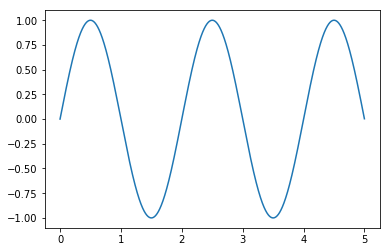

In [4]:
import matplotlib.pyplot as plt  
import numpy as np 

x = np.arange(0.0, 5.0, 0.001)
y = np.sin(np.pi*x)
plt.plot(x, y)
plt.show()

This is an example of the trigonometric equation, $y = {\pi}x$

Well light is the same thing. Look, here's a light wave:

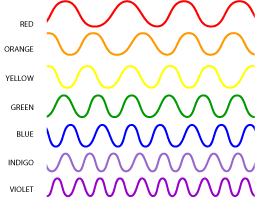

Notice, the red light waves are slower than the purple ones. We call it the period in Maths. This is how you can represent light using functions!

### Pixels
A pixel (short for picture element, duh!) is a measurement of a wave. There are many ways of representing these measurements - these are the different **colour spaces**:

The main colour space we use on websites is **RGB**, which stands for Red, Green and Blue. We can represent _most_ colours using a mixture of these three (although it is an approximation).

So a pixel is represented in its most basic form as:

$pixel = [red, green, blue]$

In computers, each of red, green and blue are measured from 0 to 255. How much data do we need to store this?

You can calculate how many bits you need to store $n$ different choices using this equation:

$bits = \log_2{n}$

In [3]:
import numpy as np 
number_of_shades_of_red = 256.0
bits_we_need = np.log2(number_of_choices)

print(bits_we_need)

NameError: name 'number_of_choices' is not defined


To represent this range, you need 8 bits. But if you nibble 8 bits of a sandwich, you've essentially taken a bite. Computer scientists spell it as **byte**. 

### JPEGs
So a JPEG image is basically a bunch of pixels arranged in columns and rows. 

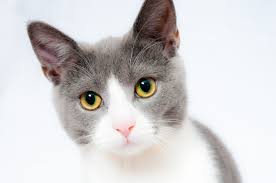

The image of this cat has dimensions of $276 \cdot 183$ and is about $4,638$ bytes in size. 

So if the number of pixels is $276\cdot183 = 50,508$, and we know each pixel is represented by 3 bytes for the red, green and blue, we should be able to calculate the size of the file.

In [ ]:
# a pixel is (r, g, b)
# an r is just one byte
size_of_one_pixel = 1 + 1 + 1
number_of_pixels = 276 * 183
size_of_image = size_of_one_pixel * number_of_pixels

print("Size of image: {} bytes".format(size_of_image))

Wait a minute, didn't we just check and see that the size was $4,638$ bytes? Where are those $146,000+$ bytes going? The answer, is **compression**.

### Compression
TODO

## 2. Image analysis and processing
There are many ways to analyse images. Approaches based in human-engineered methods (as oppposed to AI) generally are categorised by how they process each pixel in an image:

 - point
 - local - processing is dependent on the neighbourhood surrounding that pixel
 - global - processing is dependent on entire image

Image processing usually affects the quality of an image - that is, it makes it nicer by some aesthetic measure. When does an image not look nice? 

  - when it's blurry
  - when it's pixelly/noisy
  - when it's over-saturated (like at night)

In discourse, these things are categorised as **noise**. You might've heard of the signal-to-noise ratio - that is, how much of what we actually want (termed the signal) compared to the noise. Here's an example of what noise looks like:

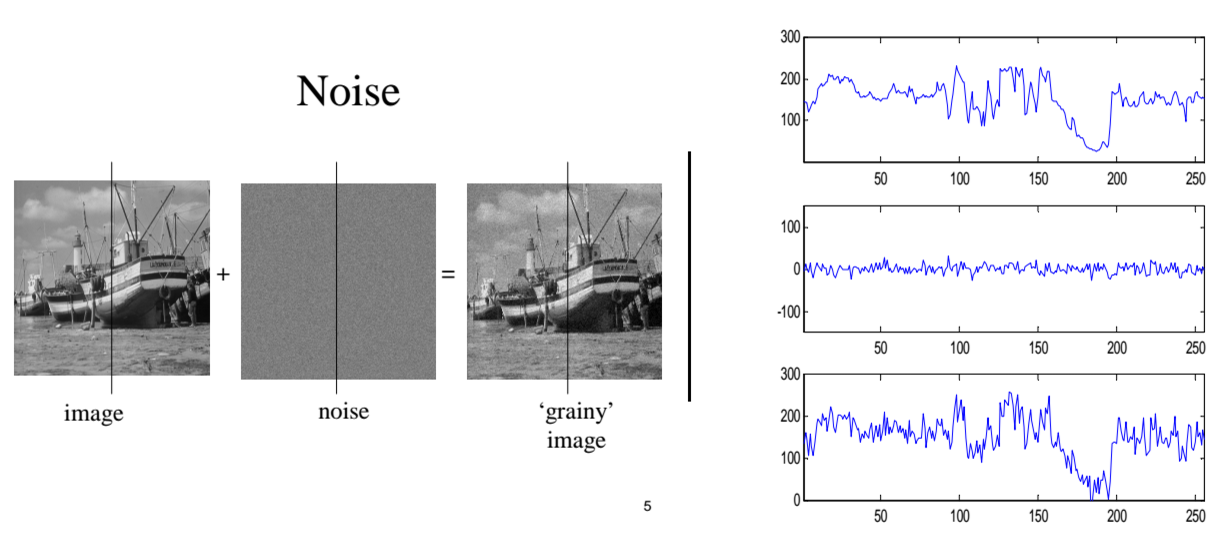

Some types of noise include:
 - **Gaussian**: noise that is typical of natural processes. e.g. poor lighting conditions. It's called Gaussian because it relates directly to the normal (Gaussian) probability distribution. 
 - **Uniform**: artifical noise that is evenly distributed. Usually used to test image restoration algorithms.
 - **Salt and Pepper**: The presence of single dark pixels in bright regions (or the inverse). Usually caused by data corruption.

### Noise elimination
Noise can be eliminated through image filters. Image filters work on a _local_ basis. They involve a process called **convolution**, whereby one multiplies pixels of a neighbourhood of (r,c) by the corresponding coefficients of a filter, and add them all up. 

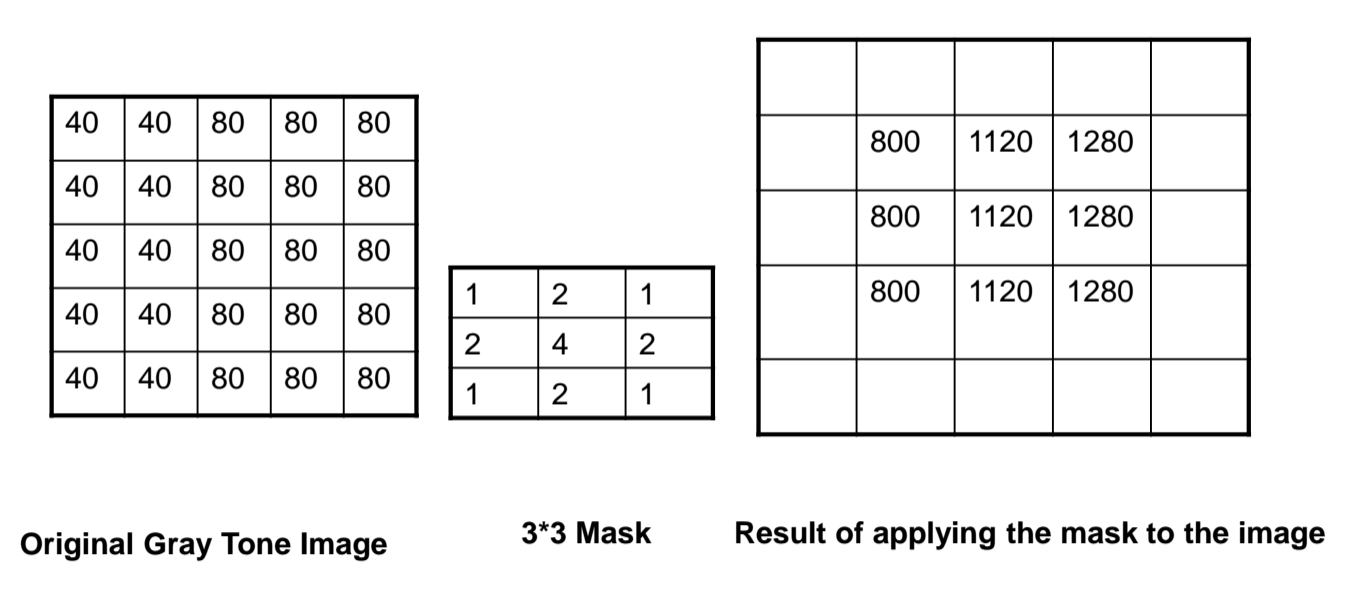

In [ ]:
input_pixels = np.matrix([
             [40, 40, 80],
             [40, 40, 80],
             [40, 40, 80]
            ])

image_mask = np.matrix([
             [1, 2, 1],
             [2, 4, 2],
             [1, 2, 1]
            ])

def convolve_filter(_input, _filter):
    # Multiply the input pixels element-wise by the coefficients of the filter
    # And then return the average of these values
    return np.multiply(_input, _filter).sum()

filtered_pixel = convolve_filter(input_pixels, image_mask)
print(filtered_pixel)

Two distinct reasons for filters:
 1. _Human_: Improving the image for the human eye
 2. _Machine_: Pre-processing as part of image analysis (e.g. an edge detection filter for recognising objects)
 
Let's play with some filters!

Image shape: (332, 486)
Filter shape: (3, 3)


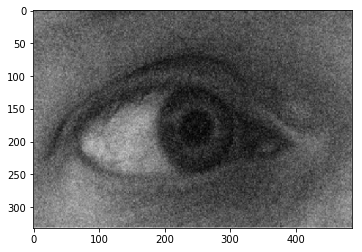

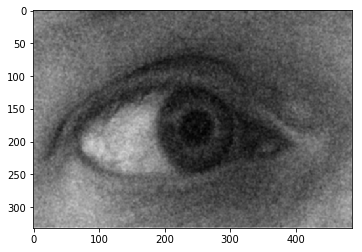

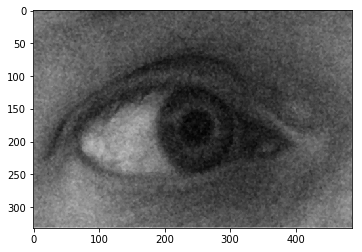

In [28]:
from scipy import misc, ndimage
import matplotlib.pyplot as plot
import numpy as np

def show_image(img):
    plot.imshow(img)
    plot.show()
    
edge_enhancement = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

smoothing = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])


# Import a sample image of a racoon
# This image will be imported as grayscale, meaning there's only one component of colour (as opposed to 3 in RGB)
example_image = misc.imread('./noisy.png', flatten=True)#misc.face(gray=True)
plot.gray()
print("Image shape: {}".format(example_image.shape))

# Define our filter
filter_ = smoothing
print("Filter shape: {}".format(filter_.shape))

# Convolve the image with our filter
filtered_image = ndimage.convolve(example_image, filter_)

# Demonstrate median filtering
median_image = ndimage.median_filter(example_image, 3)


show_image(example_image)
show_image(filtered_image)
show_image(median_image)

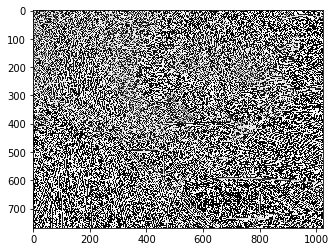

In [22]:
# Example using RGB filters
#kernel = np.resize(kernel, (3, 3, 3,))

# https://softwaredevelopmentperestroika.wordpress.com/2014/02/11/image-processing-with-python-numpy-scipy-image-convolution/

plot.imshow((example_image - filtered_image))
plot.show()

**Low pass** filters, otherwise known as "smoothing“ or “softening”, is employed to remove high spatial frequency
noise from a digital image. These filters replace each pixel with a weighted sum of each pixel's neighbourhood.

**Median filtering** is a non-linear operation that replaces a pixel with the median of its neighbourhood.

